In [37]:
import pandas as pd

url2019 = 'https://api.census.gov/data/2019/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
url2020 = 'https://api.census.gov/data/2020/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'

In [38]:
import requests

response2019 = requests.get(url2019)
response2020 = requests.get(url2020)

print(response2019, response2020)

<Response [200]> <Response [200]>


In [39]:
data2019 = response2019.text
data2020 = response2020.text

In [40]:
# 2019 data
data2019 = data2019[2:-2]
data2019_list = data2019.split('],\n[')

data2019_df = []

for row in data2019_list:
    row = row.replace('null', '"null"')
    row = row[1:-1]
    row_list = row.split('","')
    data2019_df.append(row_list)


# 2020 data
data2020 = data2020[2:-2]
data2020_list = data2020.split('],\n[')

data2020_df = []

for row in data2020_list:
    row = row.replace('null', '"null"')
    row = row[1:-1]
    row_list = row.split('","')
    data2020_df.append(row_list)

In [41]:
# 2019 DataFrame
df2019_columns = data2019_df[0]

df2019 = pd.DataFrame(data2019_df[1:], columns=df2019_columns)
pd.set_option('display.max_columns', None)

# 2020 DataFrame
df2020_columns = data2020_df[0]

df2020 = pd.DataFrame(data2020_df[1:], columns=df2020_columns)
pd.set_option('display.max_columns', None)

In [42]:
data = pd.concat([df2019, df2020])

In [43]:
years = data[['YEAR']].drop_duplicates()
years

,YEAR
0,2019
0,2020


In [44]:
sexes=data[['SEX_LABEL']].drop_duplicates()
sexes = sexes.loc[sexes['SEX_LABEL'] != 'Total']
sexes = sexes.loc[(sexes['SEX_LABEL'] != 'Classifiable') & (sexes['SEX_LABEL'] != 'Unclassifiable')]
sexes

,SEX_LABEL
0,Equally male/female
20,Female
30,Male


In [45]:
races_all=data[['RACE_GROUP','RACE_GROUP_LABEL']].drop_duplicates()
races_all = races_all.loc[(races_all['RACE_GROUP_LABEL'] !='Total') & (races_all['RACE_GROUP_LABEL'] !='Equally minority/nonminority')]
races_all = races_all.loc[(races_all['RACE_GROUP_LABEL'] !='Minority') & (races_all['RACE_GROUP_LABEL'] !='Nonminority')]
races_all = races_all.loc[(races_all['RACE_GROUP_LABEL'] !='Classifiable') & (races_all['RACE_GROUP_LABEL'] !='Unclassifiable')]
display(races_all)

,RACE_GROUP,RACE_GROUP_LABEL
158,30,White
185,40,Black or African American
281,50,American Indian and Alaska Native
291,60,Asian
433,70,Native Hawaiian and Other Pacific Islander


In [46]:
vet_statuses=data[['VET_GROUP','VET_GROUP_LABEL']].drop_duplicates()
vet_statuses = vet_statuses.loc[vet_statuses['VET_GROUP_LABEL']!="Total"]
vet_statuses = vet_statuses.loc[(vet_statuses['VET_GROUP_LABEL']!="Classifiable") & (vet_statuses['VET_GROUP_LABEL']!="Unclassifiable")]
vet_statuses

,VET_GROUP,VET_GROUP_LABEL
609,002,Veteran
807,003,Equally veteran/nonveteran
927,004,Nonveteran


In [47]:
firm_sz=data[['EMPSZFI_LABEL']].drop_duplicates()
firm_sz = firm_sz.loc[(firm_sz['EMPSZFI_LABEL'] != 'All firms') & (firm_sz['EMPSZFI_LABEL'] != 'Firms with less than 500 employees')]
firm_sz

,EMPSZFI_LABEL
1,Firms with no employees
2,Firms with 1 to 4 employees
3,Firms with 5 to 9 employees
4,Firms with 10 to 19 employees
5,Firms with 20 to 49 employees
6,Firms with 50 to 99 employees
7,Firms with 100 to 249 employees
8,Firms with 250 to 499 employees
9,Firms with 500 employees or more


In [48]:
df = pd.merge(data,sexes,how='inner',on='SEX_LABEL')
df = pd.merge(df,races,how='inner',on='RACE_GROUP_LABEL')
df = pd.merge(df,firm_sz,how='inner',on='EMPSZFI_LABEL')
df = df[['YEAR_x', 'EMP','SEX_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL', 'EMPSZFI_LABEL']]
df

,YEAR_x,EMP,SEX_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL
0,2019,0,Equally male/female,White,Total,Firms with no employees
1,2019,0,Equally male/female,White,Total,Firms with no employees
2,2019,0,Equally male/female,White,Total,Firms with no employees
3,2019,0,Equally male/female,White,Total,Firms with no employees
4,2019,0,Equally male/female,White,Total,Firms with no employees
...,...,...,...,...,...,...
13645,2020,156640,Male,Nonminority,Total,Firms with 500 employees or more
13646,2020,1532625,Male,Nonminority,Total,Firms with 500 employees or more
13647,2020,1532625,Male,Nonminority,Total,Firms with 500 employees or more
13648,2020,184386,Male,Nonminority,Total,Firms with 500 employees or more


In [ ]:
year2019 = [3777.085, 1013.629, 640.827, 555.046, 94.957, 20.868]
year2020 = [3828.48, 1004.59, 638.67, 552.92, 95.8, 20.96]
firmSize = ['0-4', '5-9', '10-19', '20-99', '100-499', '500+']

In [50]:
df['EMP'] = pd.to_numeric(df['EMP'])

# Count of employees per firm size per race
pivot = pd.pivot_table(df, values='EMP', index=['YEAR_x', 'SEX_LABEL', 'RACE_GROUP_LABEL', 'EMPSZFI_LABEL'], aggfunc='sum')
# Index pivot table
pivot.reset_index(inplace=True)
display(pivot)


,YEAR_x,SEX_LABEL,RACE_GROUP_LABEL,EMPSZFI_LABEL,EMP
0,2019,Equally male/female,American Indian and Alaska Native,Firms with 1 to 4 employees,60
1,2019,Equally male/female,American Indian and Alaska Native,Firms with 10 to 19 employees,228
2,2019,Equally male/female,American Indian and Alaska Native,Firms with 100 to 249 employees,1282
3,2019,Equally male/female,American Indian and Alaska Native,Firms with 20 to 49 employees,186
4,2019,Equally male/female,American Indian and Alaska Native,Firms with 250 to 499 employees,0
...,...,...,...,...,...
418,2020,Male,White,Firms with 250 to 499 employees,11837094
419,2020,Male,White,Firms with 5 to 9 employees,12983936
420,2020,Male,White,Firms with 50 to 99 employees,19136940
421,2020,Male,White,Firms with 500 employees or more,41660026


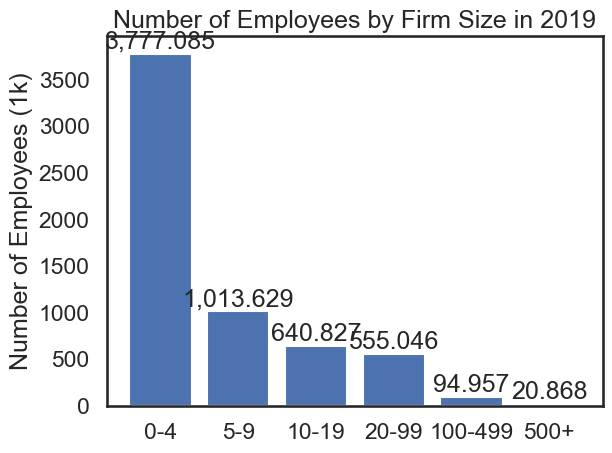

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
fig, ax = plt.subplots()

# x and y variables
x = firmSize
y = year2019
labels = ['0-4', '5-9', '10-19', '20-99', '100-499', '500+']

# Finalize the plot
bar_container = ax.bar(x, y, label=labels)

ax.set(ylabel='Number of Employees (1k)', title='Number of Employees by Firm Size in 2019')
ax.bar_label(bar_container, fmt='{:,.3f}')

plt.show()

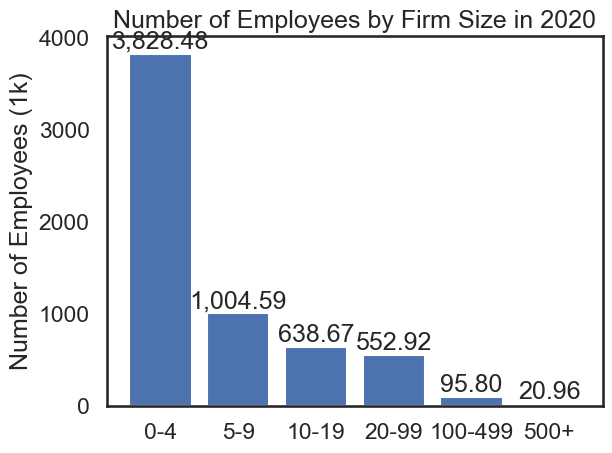

In [57]:
# Set up the matplotlib figure
fig, ax = plt.subplots()

# x and y variables
x = firmSize
y = year2020
labels = ['0-4', '5-9', '10-19', '20-99', '100-499', '500+']

# Finalize the plot
bar_container = ax.bar(x, y, label=labels)

ax.set(ylabel='Number of Employees (1k)', title='Number of Employees by Firm Size in 2020')
ax.bar_label(bar_container, fmt='{:,.2f}')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

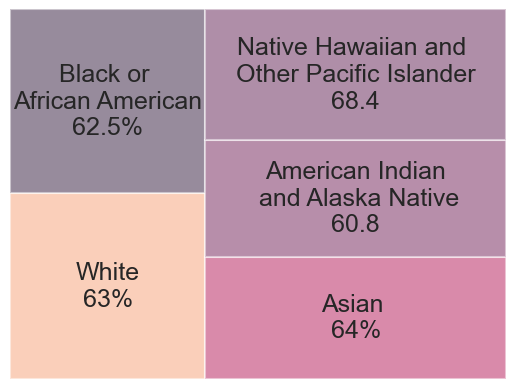

In [56]:
#treemap for races
import squarify
# Importing Matplotlib
import matplotlib.pyplot as plt
# Plotting a Python Treemap
squarify.plot(sizes=[63, 62.5, 64, 60.8, 68.4], label=['White\n63%', 'Black or \nAfrican American\n62.5%', 'Asian \n64%', 'American Indian\n and Alaska Native\n60.8', 'Native Hawaiian and \nOther Pacific Islander\n68.4'], alpha=0.5)
plt.axis('off')
plt.set(title='Number of Employees by Firm Size in 2019')
# Displaying the plot
plt.show()

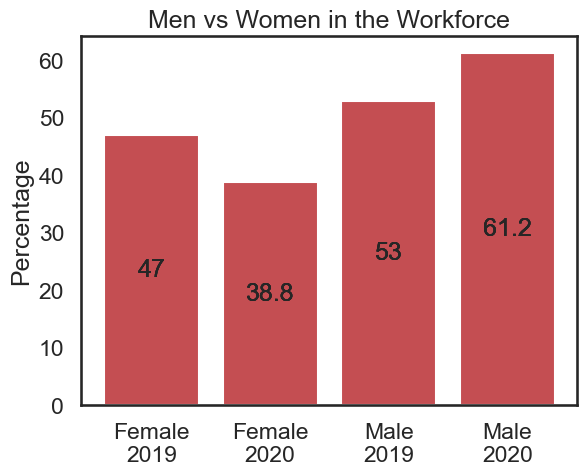

In [36]:
#bar graph vet & non-vet
fig, ax = plt.subplots()

# x and y variables
gender = ['Female\n2019', 'Female\n2020', 'Male\n2019', 'Male\n2020']
percent = [47, 38.8, 53, 61.2]

# Finalize the plot
for i in gender:
    n = ax.bar(gender, percent)

    ax.bar_label(n, label_type='center')

ax.set_ylabel('Percentage')
ax.set_title('Men vs Women in the Workforce')

plt.show()